In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# import module

In [2]:
import src.Teleconnection.pattern_statistic as ps
import src.plots.eof_plots as ept
import src.Teleconnection.spatial_pattern as sp

# data load and process

 data load

In [3]:
# %%
allens = xr.open_dataset("/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc")
#%% split ens
splitens = sp.split_ens(allens)

#%% demean ens-mean
demean = splitens-splitens.mean(dim = 'ens')

#%% select traposphere
trop = demean.sel(hlayers = slice(20000,100000))

In [4]:
trop

<xarray.Dataset>
Dimensions:    (time: 149, lon: 70, lat: 32, ens: 100, hlayers: 11, bnds: 2)
Coordinates:
  * time       (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00
  * lon        (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 35.62 37.5 39.38
  * lat        (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * ens        (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * hlayers    (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) timedelta64[ns] 00:00:00 00:00:00 ... 00:00:00
    var156     (time, lat, lon, ens, hlayers) float32 -55.21 -35.16 ... 5.3

eof decompose

In [7]:
yearly_eof,_,_ = sp.season_eof(trop.var156,nmode=2,
window=10,fixed_pattern='first',return_full_eof= False,independent = True,standard=True)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
eof_all,_,_ = sp.season_eof(trop.var156,nmode=2,independent = True)

  0%|          | 0/11 [00:00<?, ?it/s]

In [9]:
all_eof = eof_all
first_eof = yearly_eof.isel(time = 0)
last_eof = yearly_eof.isel(time = -1)

# spatial plots

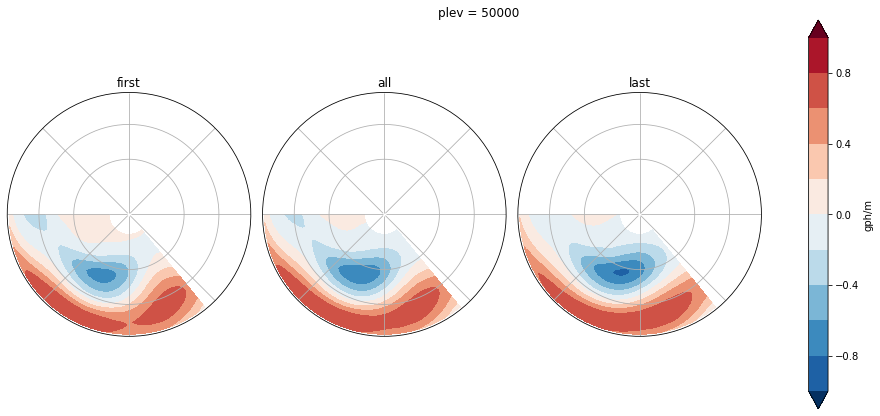

In [43]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 50000)


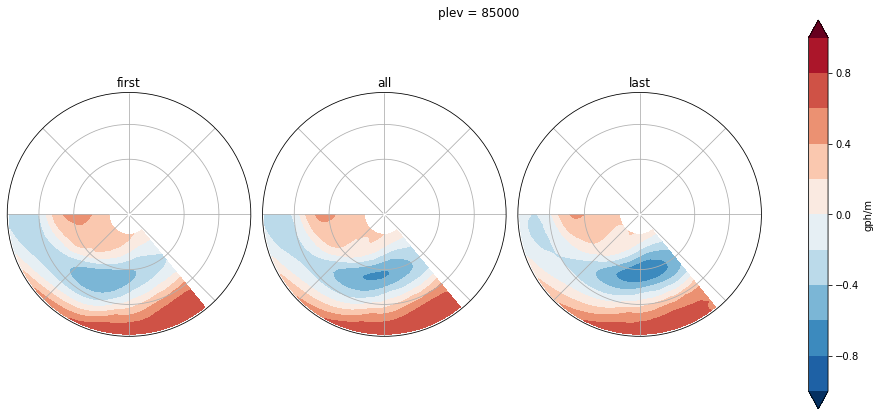

In [45]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 85000)

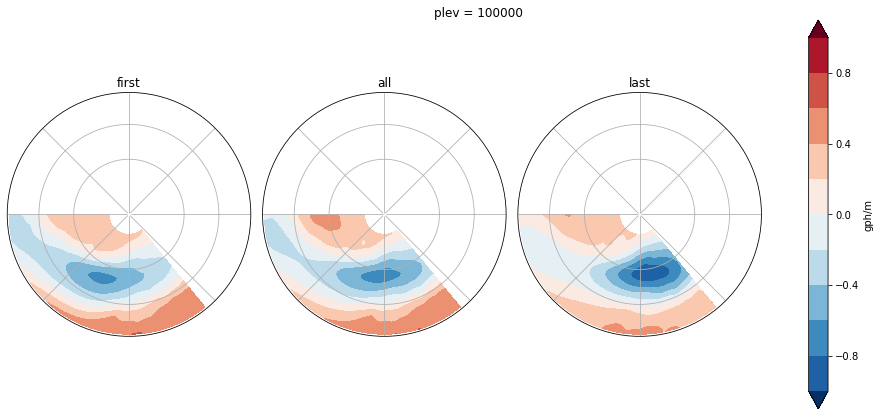

In [46]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 100000)

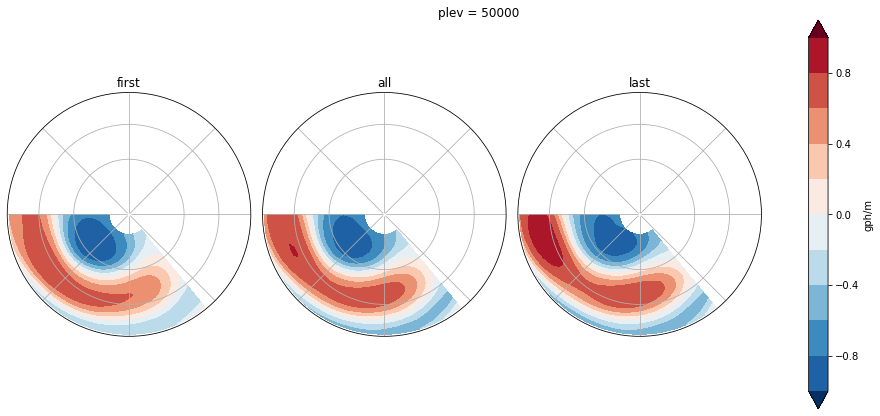

In [49]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 50000,mode = 'NAO')

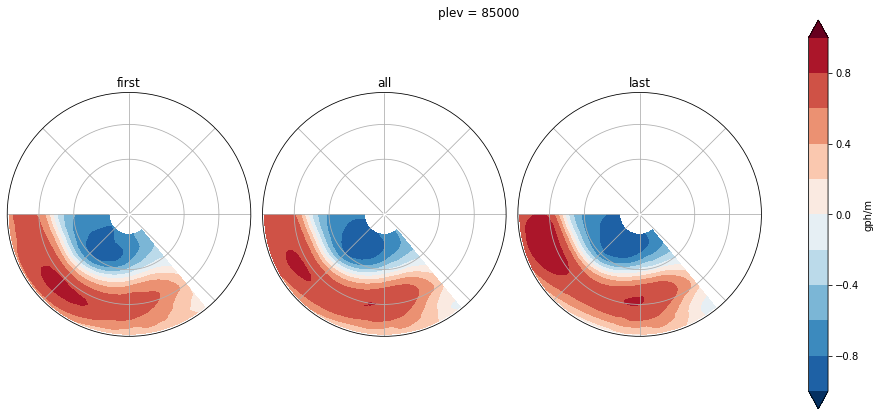

In [48]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 85000,mode = 'NAO')

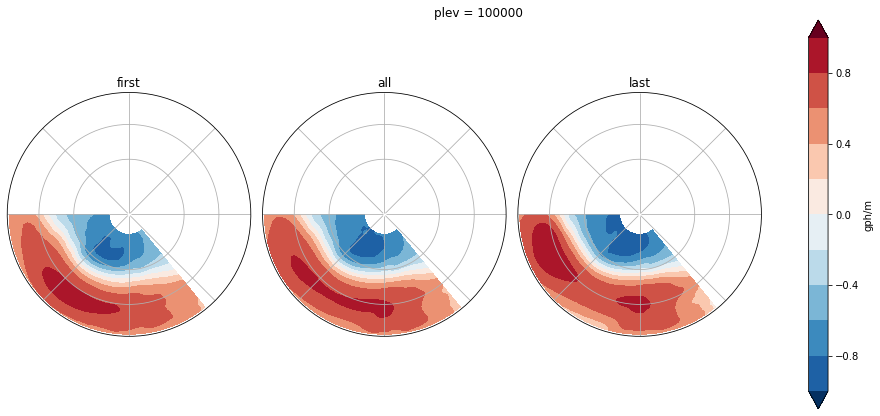

In [47]:
ept.visu_spatial_type([all_eof,first_eof,last_eof],plev = 100000,mode = 'NAO')

# EA lon-height

In [15]:
all_eof.to_netcdf("/work/mh0033/m300883/3rdPanel/data/EOF_result/all_first_last_eof/all_eof.nc")
first_eof.to_netcdf("/work/mh0033/m300883/3rdPanel/data/EOF_result/all_first_last_eof/first_eof.nc")
last_eof.to_netcdf("/work/mh0033/m300883/3rdPanel/data/EOF_result/all_first_last_eof/last_eof.nc")


In [16]:
# %% to lon-height
all_lon_height_ea = ps.lon_height(all_eof,mode='EA')
first10_lon_height_ea = ps.lon_height(first_eof,mode='EA')
last10_lon_height_nao = ps.lon_height(last_eof,mode='EA')

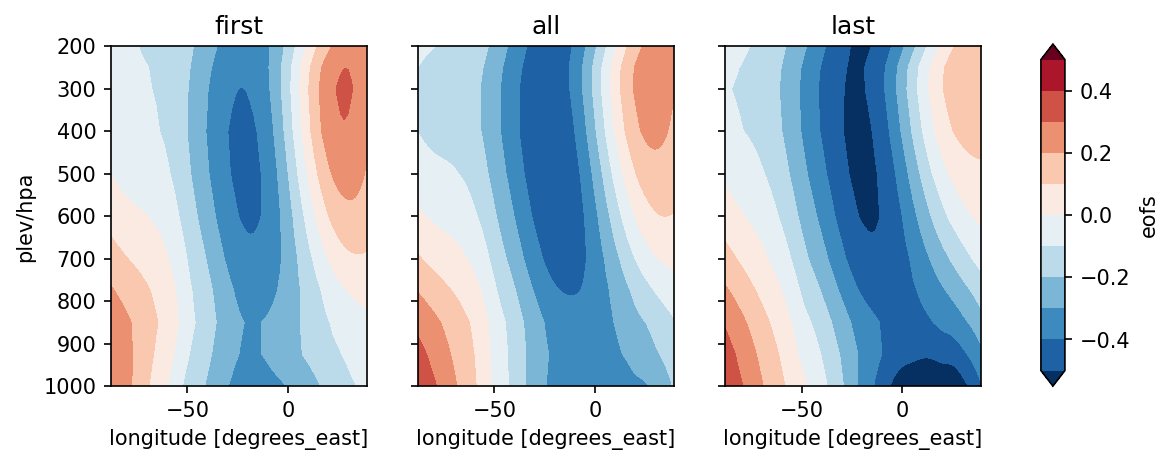

In [51]:
fig,axes = plt.subplots(1,3,figsize = (8,3),dpi = 150,sharey=True)

levels = np.arange(-0.5,0.51,0.1)

first10_lon_height_nao.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[0],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
all_lon_height_nao.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[1],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
im = last10_lon_height_ea.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[2],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)

axes[0].set_title("first")
axes[1].set_title("all")
axes[2].set_title("last")

axes[0].set_ylabel('plev/hpa')
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)

plt.subplots_adjust(right = 0.85)
cbar_ax = fig.add_axes([0.9, 0.125, 0.02, 0.76])
fig.colorbar(im, cax=cbar_ax,label = 'eofs')


# plt.savefig("/work/mh0033/m300883/3rdPanel/plots/EA_lon_height_afl.png")


# EA -lat-height

In [52]:
all_lat_height_ea = ps.lat_height(all_eof,mode='EA')
first10_lat_height_ea = ps.lat_height(first_eof,mode='EA')
last10_lat_height_ea = ps.lat_height(last_eof,mode='EA')

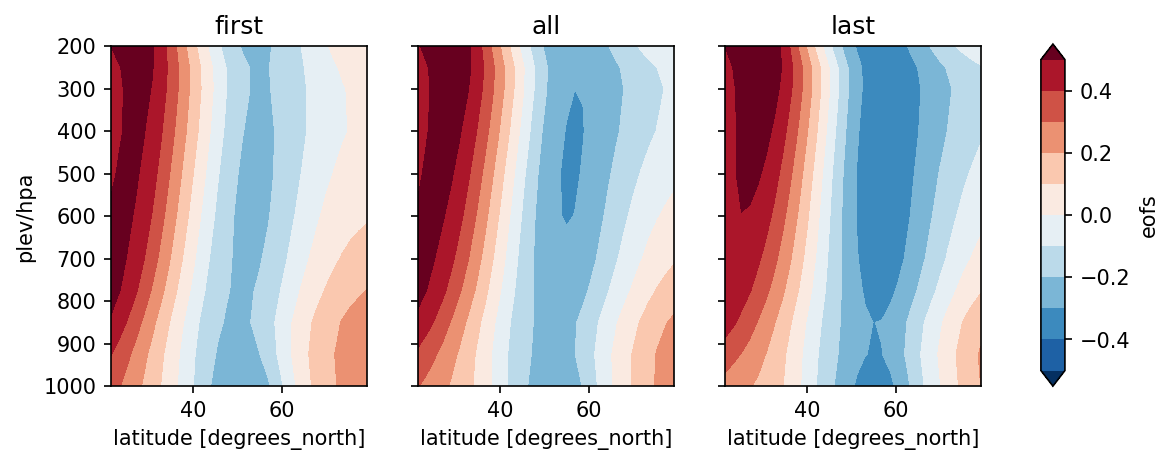

In [53]:
fig,axes = plt.subplots(1,3,figsize = (8,3),dpi = 150,sharey=True)

levels = np.arange(-0.5,0.51,0.1)

first10_lat_height_ea.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[0],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
all_lat_height_ea.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[1],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
im = last10_lat_height_ea.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[2],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)

axes[0].set_title("first")
axes[1].set_title("all")
axes[2].set_title("last")

axes[0].set_ylabel('plev/hpa')
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)

plt.subplots_adjust(right = 0.85)
cbar_ax = fig.add_axes([0.9, 0.125, 0.02, 0.76])
fig.colorbar(im, cax=cbar_ax,label = 'eofs')


# plt.savefig("/work/mh0033/m300883/3rdPanel/plots/EA_lon_height_afl.png")


# NAO lat-height

In [54]:
all_lat_height_nao = ps.lat_height(all_eof,mode='NAO')
first10_lat_height_nao = ps.lat_height(first_eof,mode='NAO')
last10_lat_height_nao = ps.lat_height(last_eof,mode='NAO')

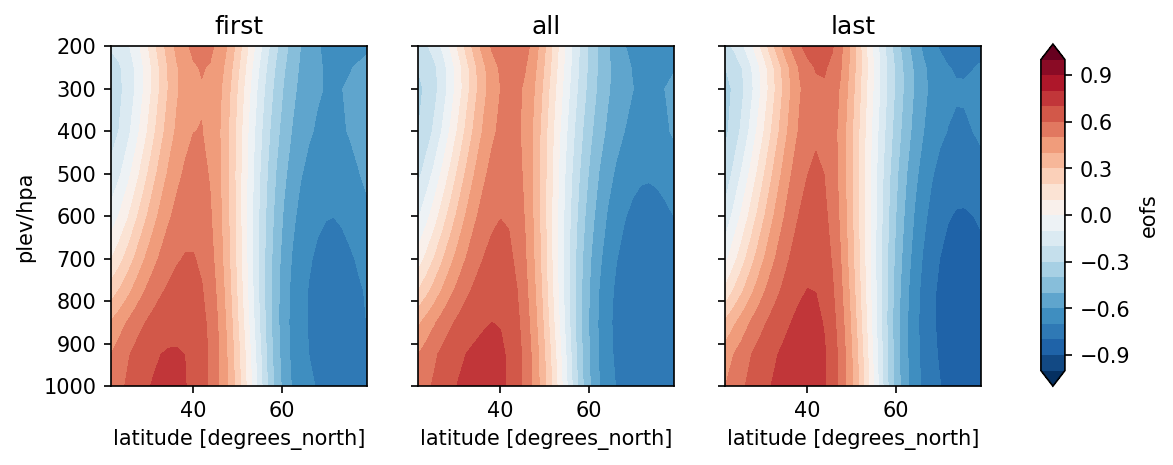

In [56]:
fig,axes = plt.subplots(1,3,figsize = (8,3),dpi = 150,sharey=True)

levels = np.arange(-1,1.1,0.1)

first10_lat_height_nao.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[0],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
all_lat_height_nao.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[1],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
im = last10_lat_height_nao.plot.contourf(x = 'lat',y = 'hlayers',ax = axes[2],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)

axes[0].set_title("first")
axes[1].set_title("all")
axes[2].set_title("last")

axes[0].set_ylabel('plev/hpa')
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)

plt.subplots_adjust(right = 0.85)
cbar_ax = fig.add_axes([0.9, 0.125, 0.02, 0.76])
fig.colorbar(im, cax=cbar_ax,label = 'eofs')


# plt.savefig("/work/mh0033/m300883/3rdPanel/plots/EA_lon_height_afl.png")
